<a href="https://colab.research.google.com/github/lima-breno/sampling_models/blob/main/SM_08_Projeto_Regress%C3%A3o_M%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
warnings.filterwarnings("ignore")

Importando o data set

In [ ]:
cerveja = pd.read_csv('Consumo_cerveja_1.csv')

Análise exploratória dos dados

Primeiras observações da base de dados.

In [ ]:
cerveja.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


Últimas Observações

In [ ]:
cerveja.tail()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
360,27/12/2015,24.00,21.1,28.2,13.6,1,32.307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26.095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22.309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20.467
364,31/12/2015,24.76,20.2,29.0,0.0,0,22.446


Dimensão da base de dados: são 365 observações e 7 variáveis.

In [ ]:
cerveja.shape

(365, 7)

Validação de observações nulas (NULL)


In [ ]:
cerveja.isna().sum()

Data                  0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitacao          0
Final_de_Semana       0
Consumo               0
dtype: int64

Tipo das variáveis.

In [ ]:
cerveja.dtypes

Data                   object
Temperatura_Media     float64
Temperatura_Minima    float64
Temperatura_Maxima    float64
Precipitacao          float64
Final_de_Semana         int64
Consumo               float64
dtype: object

Tabela descritiva das variáveis

In [ ]:
cerveja.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


Gráfico correlograma

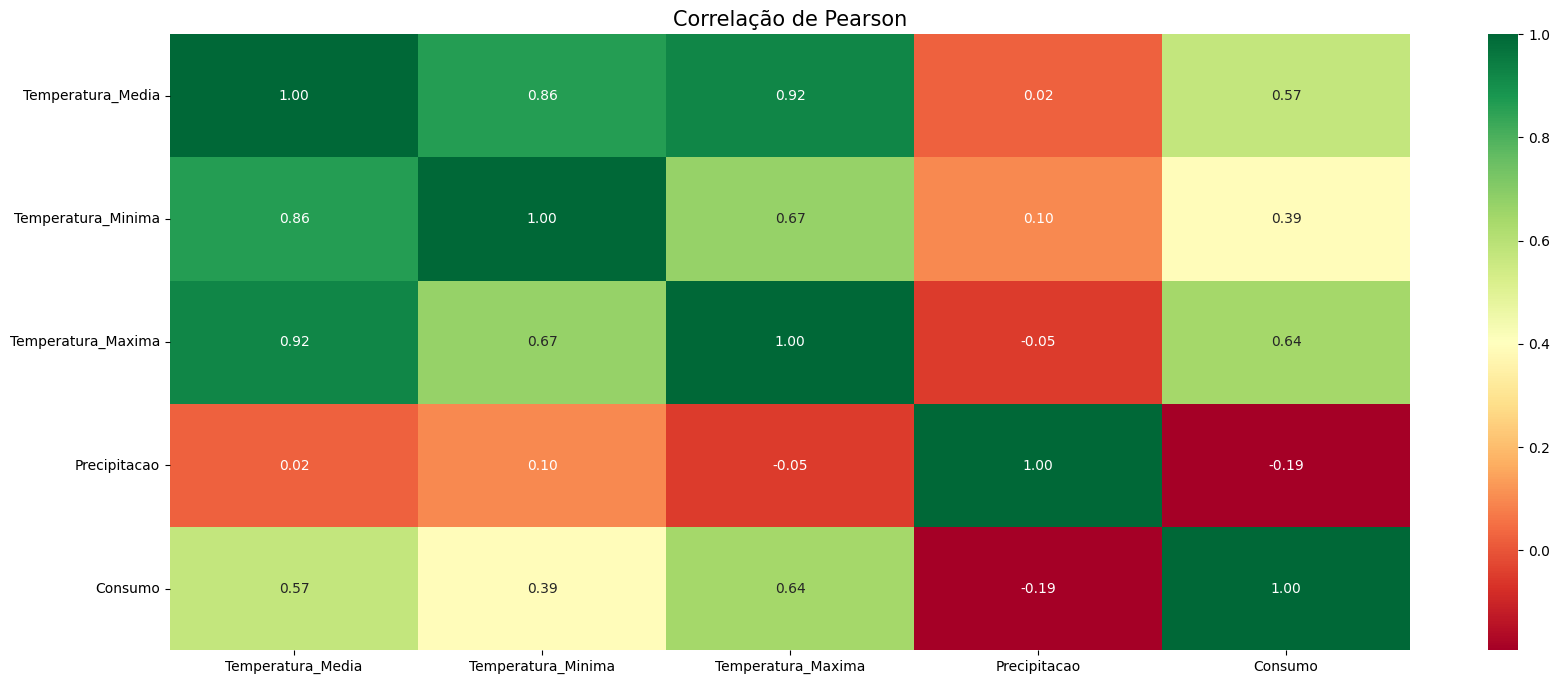

In [ ]:
plt.figure(figsize=(20,8))
cerveja_quanti = cerveja[['Temperatura_Media', 'Temperatura_Minima',
       'Temperatura_Maxima', 'Precipitacao',
       'Consumo']]
sns.heatmap(cerveja_quanti.corr(),annot=True, cmap="RdYlGn", fmt=".2f");
plt.title('Correlação de Pearson',size=15);

Boxplot:


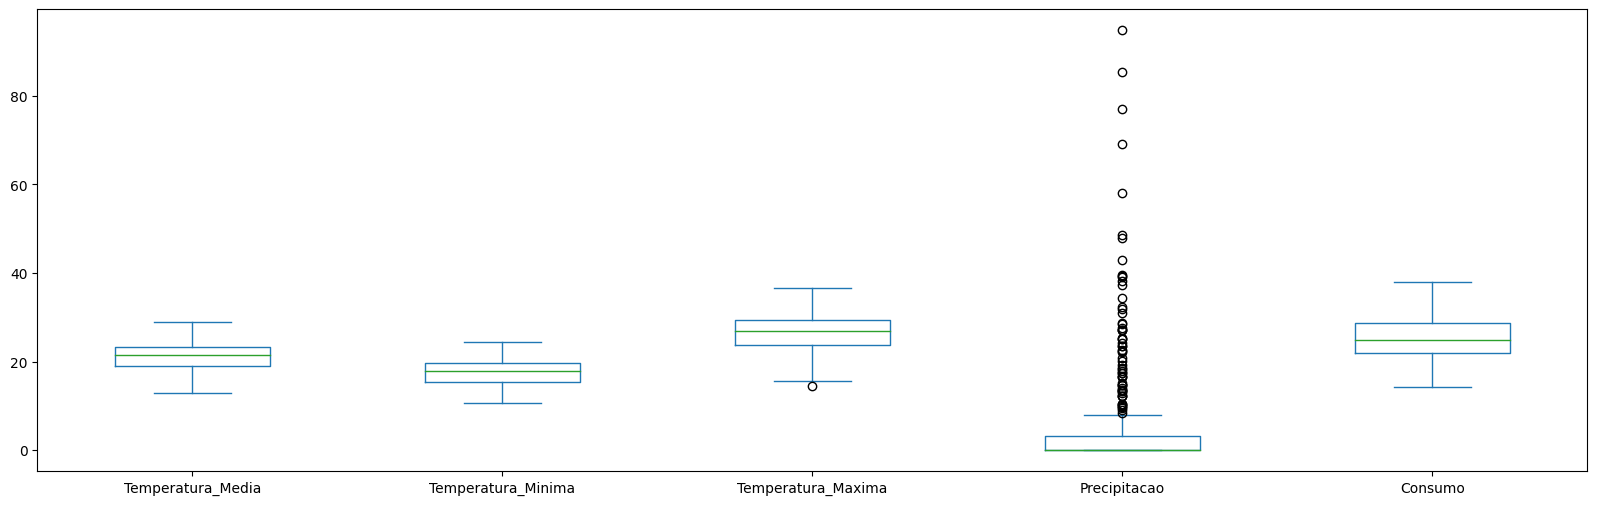

In [ ]:
cerveja[['Temperatura_Media', 'Temperatura_Minima',
       'Temperatura_Maxima', 'Precipitacao',
       'Consumo']].plot.box(figsize=(20,6));

Análise Gráfica das variáveis via Histograma e dispersão

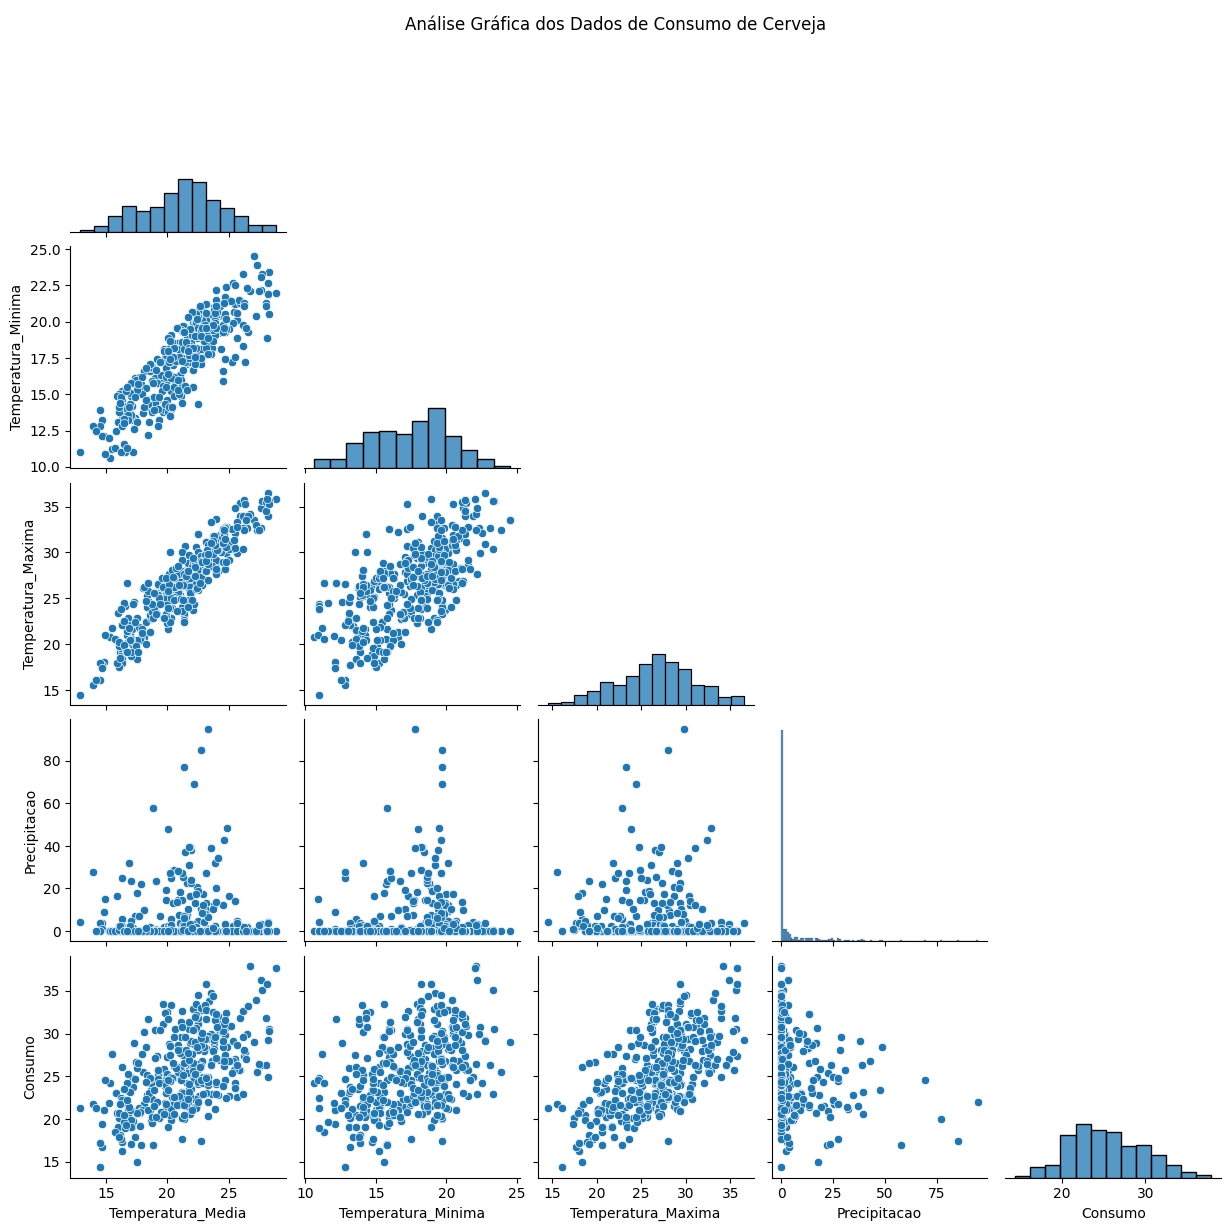

In [ ]:
# Análise gráfica - Pairplot
sns.pairplot(cerveja_quanti, corner=True) # corner corta metade do gráfico pois é simetrico.
plt.suptitle("Análise Gráfica dos Dados de Consumo de Cerveja")
plt.show()

Gerando modelos com statsmodels

In [ ]:
#Variáveis independentes
X = cerveja.drop(['Consumo','Data'],axis=1)
#Variável dependentes
y = cerveja['Consumo']

In [ ]:
modelo1 = (sm.OLS(y,sm.add_constant(X)).fit())
modelo1.summary(title='Sumário do modelo')

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Sumário do modelo                               
==============================================================================
Dep. Variable:                Consumo   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           1.19e-97
Time:                        21:43:29   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4447      0.845      7.627      0.000       4.783       8.107
Temperatura_Media      0.0308      0.188      0.164      0.870      -0.339       0.401
Temperatura_Minima    -0.0190      0.110     -0.172      0.863      -0.236       0.198
Temperatura_Maxima     0.6560      0.095      6.895      0.000       0.469       0.843
Precipitacao          -0.0575      0.010     -5.726      0.000      -0.077      -0.038
Final_de_Semana        5.1832      0.271     19.126      0.000       4.650       5.716
==============================================================================
Omnibus:                       39.362   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.936
Skew:                           0.153   Prob(JB):                      0.00155
Kurtosis:                       2.130   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise gráfica de resíduos

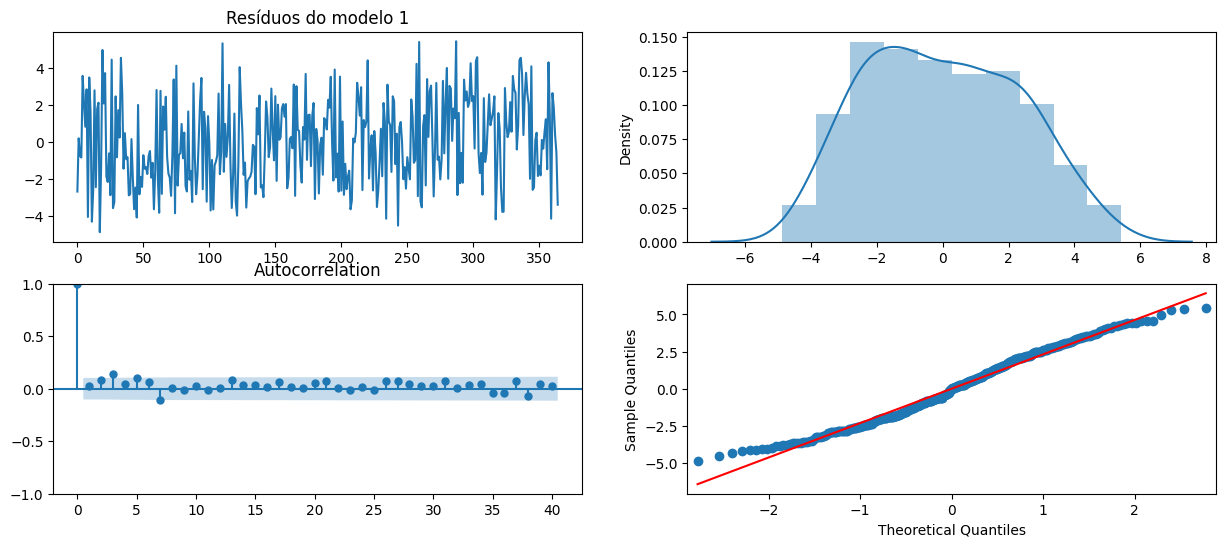

In [ ]:
residuos1 = modelo1.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 1", ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0][1])
plot_acf(residuos1,lags=40, ax=ax[1][0])
qqplot(residuos1,line='s', ax=ax[1][1]);

In [ ]:
estatistica_shapiro,p_shapiro = stats.shapiro(modelo1.resid)
print(f'Estatísticas de teste: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))

Estatísticas de teste: 0.9798177480697632
p-valor: 5.460042302729562e-05


Text(0.5, 1.0, 'Homocedasticidade - Modelo 1 - Full')

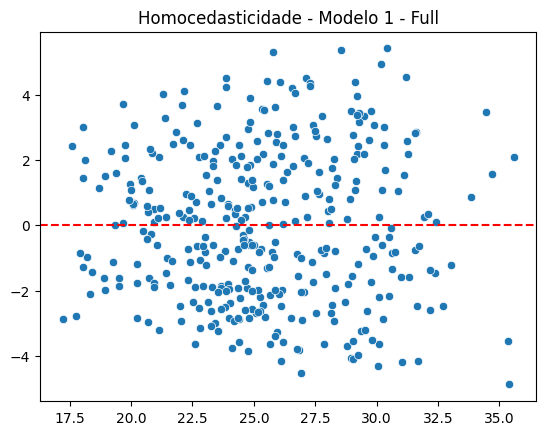

In [ ]:
# Gráfico de homocedasticidade
sns.scatterplot(x=modelo1.fittedvalues, y=residuos1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Modelo 1 - Full')

Teste de Hipótese para Homocedasticidade

In [ ]:
estatistica, p, f, fp = het_breuschpagan(modelo1.resid, modelo1.model.exog)
print(f'Estatísticas de teste: {format(estatistica)}')
print(f'p-valor: {p}')
print(f'f-valor: {fp}')
print(f'f_p-valor: {f}')

Estatísticas de teste: 31.352601855902925
p-valor: 7.979156260466161e-06
f-valor: 5.004263678270128e-06
f_p-valor: 6.746993460088692


Text(0, 0.5, 'Resíduos Padronizados')

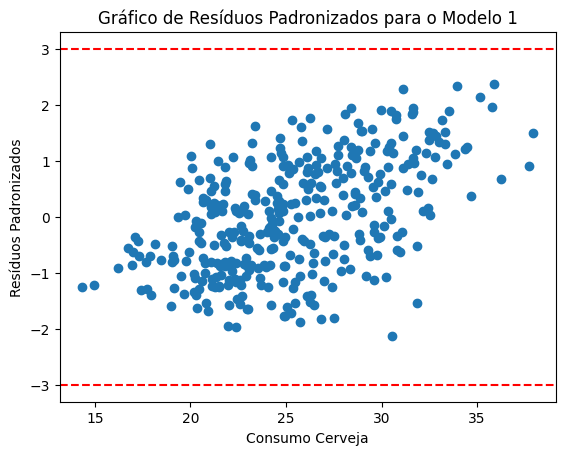

In [ ]:
residuos_padronizados = modelo1.get_influence().resid_studentized_internal

plt.scatter(y, residuos_padronizados)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title(f'Gráfico de Resíduos Padronizados para o Modelo 1')
plt.xlabel('Consumo Cerveja')
plt.ylabel('Resíduos Padronizados')

#### Análise geral dos residuos:
| Modelo  | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|---------|----------------------------------|----------------------------|---------|----------|
| Full    | ❌                               | ❌                          | ❌       | ✅        |

Modelo 2 - Retirando variáveis não significativas pelo teste T

In [ ]:
X.columns

Index(['Temperatura_Media', 'Temperatura_Minima', 'Temperatura_Maxima',
       'Precipitacao', 'Final_de_Semana'],
      dtype='object')

In [ ]:
#Variáveis independentes
X1 = X.drop(['Temperatura_Media','Temperatura_Minima'],axis=1)

In [ ]:
X1.columns

Index(['Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana'], dtype='object')

In [ ]:
modelo2 = (sm.OLS(y,sm.add_constant(X1)).fit())
modelo2.summary(title='Sumário do modelo')

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Sumário do modelo                               
==============================================================================
Dep. Variable:                Consumo   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     313.5
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          3.85e-100
Time:                        21:46:46   Log-Likelihood:                -824.09
No. Observations:                 365   AIC:                             1656.
Df Residuals:                     361   BIC:                             1672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4321      0.774      8.310      0.000       4.910       7.954
Temperatura_Maxima     0.6685      0.028     23.622      0.000       0.613       0.724
Precipitacao          -0.0575      0.010     -5.847      0.000      -0.077      -0.038
Final_de_Semana        5.1841      0.270     19.200      0.000       4.653       5.715
==============================================================================
Omnibus:                       38.795   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.850
Skew:                           0.153   Prob(JB):                      0.00162
Kurtosis:                       2.133   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise gráfica de resíduos

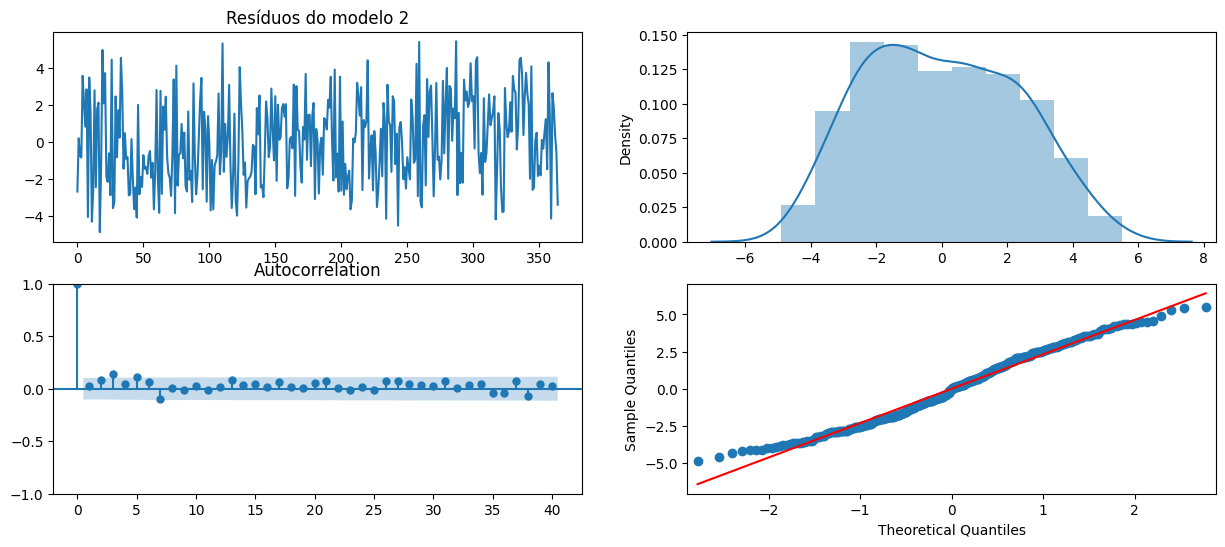

In [ ]:
residuos2 = modelo2.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Resíduos do modelo 2", ax=ax[0][0])
sns.distplot(residuos2,ax=ax[0][1])
plot_acf(residuos2,lags=40, ax=ax[1][0])
qqplot(residuos2,line='s', ax=ax[1][1]);

In [ ]:
estatistica_shapiro,p_shapiro = stats.shapiro(modelo2.resid)
print(f'Estatísticas de teste: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))

Estatísticas de teste: 0.9800142049789429
p-valor: 6.0030426539015025e-05


Text(0.5, 1.0, 'Homocedasticidade - Modelo 2')

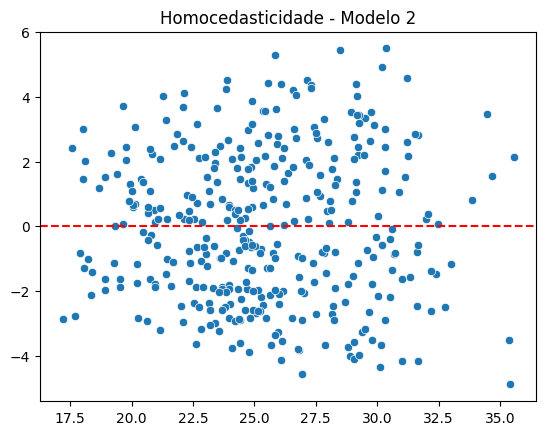

In [ ]:
# Gráfico de homocedasticidade
sns.scatterplot(x=modelo2.fittedvalues, y=residuos2)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Modelo 2')

Teste de homocedasticidade

In [ ]:
estatistica, p, f, fp = het_breuschpagan(modelo2.resid, modelo2.model.exog)
print(f'Estatísticas de teste: {format(estatistica)}')
print(f'p-valor: {p}')
print(f'f-valor: {fp}')
print(f'f_p-valor: {f}')

Estatísticas de teste: 31.223389180103894
p-valor: 7.627858215243701e-07
f-valor: 4.4656493044248804e-07
f_p-valor: 11.256674003539464


Text(0, 0.5, 'Resíduos Padronizados')

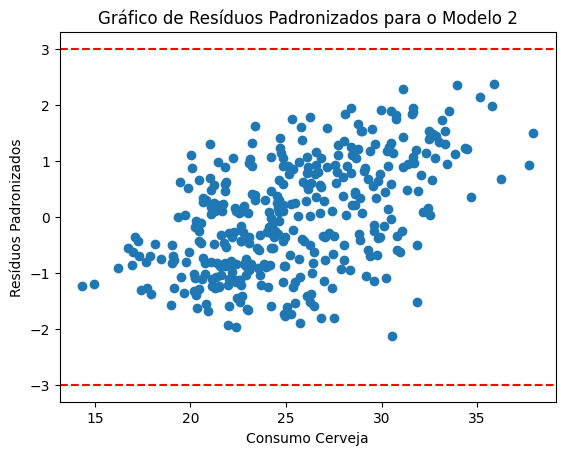

In [ ]:
residuos_padronizados = modelo2.get_influence().resid_studentized_internal

plt.scatter(y, residuos_padronizados)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.title(f'Gráfico de Resíduos Padronizados para o Modelo 2')
plt.xlabel('Consumo Cerveja')
plt.ylabel('Resíduos Padronizados')

#### Análise geral dos residuos:
| Modelo  | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|---------|----------------------------------|----------------------------|---------|----------|
| Full    | ❌                               | ❌                          | ❌       | ✅       |
| Teste-t | ❌                               | ❌                          | ❌      | ✅        |